In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=285f8b6337684965e7a20ba115122f37


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | hammerfest
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | manutuke
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | san policarpo
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | nuuk
Processing Record 14 of Set 1 | tahe
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hirara
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record

Processing Record 39 of Set 4 | jacksonville
Processing Record 40 of Set 4 | srednekolymsk
Processing Record 41 of Set 4 | zaraza
Processing Record 42 of Set 4 | tanout
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | gotsu
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | nanakuli
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | cherdyn
Processing Record 1 of Set 5 | azimur
City not found. Skipping...
Processing Record 2 of Set 5 | businga
Processing Record 3 of Set 5 | danbury
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | saint george
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | lora del rio
Processing Record 9 of Set 5 | malwan
City not found. Skipping...
Processing Record 10 of Set 5 | belyy yar
Processing Record 11 of S

Processing Record 28 of Set 8 | bredasdorp
Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | rio gallegos
Processing Record 31 of Set 8 | gombong
Processing Record 32 of Set 8 | lalmohan
Processing Record 33 of Set 8 | corinto
Processing Record 34 of Set 8 | ryotsu
Processing Record 35 of Set 8 | fairbanks
Processing Record 36 of Set 8 | seoul
Processing Record 37 of Set 8 | ugoofaaru
Processing Record 38 of Set 8 | mouzakion
City not found. Skipping...
Processing Record 39 of Set 8 | bishopton
Processing Record 40 of Set 8 | andapa
Processing Record 41 of Set 8 | ulladulla
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | griffith
Processing Record 44 of Set 8 | itaituba
Processing Record 45 of Set 8 | yatou
Processing Record 46 of Set 8 | antalaha
Processing Record 47 of Set 8 | puerto escondido
Processing Record 48 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 49 of Set 8 | ankazoabo
Processing Record 50 of Set 8 

City not found. Skipping...
Processing Record 18 of Set 12 | tidore
City not found. Skipping...
Processing Record 19 of Set 12 | muros
Processing Record 20 of Set 12 | turiacu
Processing Record 21 of Set 12 | galgani
City not found. Skipping...
Processing Record 22 of Set 12 | tombouctou
Processing Record 23 of Set 12 | yambio
Processing Record 24 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 25 of Set 12 | mundo nuevo
Processing Record 26 of Set 12 | ustyuzhna
Processing Record 27 of Set 12 | saint pete beach
Processing Record 28 of Set 12 | laguna
Processing Record 29 of Set 12 | bonthe
Processing Record 30 of Set 12 | azar shahr
City not found. Skipping...
Processing Record 31 of Set 12 | hermosillo
Processing Record 32 of Set 12 | umm kaddadah
Processing Record 33 of Set 12 | luba
Processing Record 34 of Set 12 | tremedal
Processing Record 35 of Set 12 | russell
Processing Record 36 of Set 12 | los alamos
Processing Record 37 of Set 12 | tsaotun
City not found

In [10]:
len(city_data)

548

In [11]:
#Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-15.21,73,100,6.78,GL,2022-02-01 21:01:57
1,Cherskiy,68.7500,161.3000,-6.02,80,82,3.36,RU,2022-02-01 21:06:24
2,Hammerfest,70.6634,23.6821,25.25,39,98,9.22,NO,2022-02-01 21:06:25
3,Mahebourg,-20.4081,57.7000,78.26,91,100,29.26,MU,2022-02-01 21:06:25
4,Manutuke,-38.6833,177.9167,75.97,61,94,6.35,NZ,2022-02-01 21:06:26
5,Katsuura,35.1333,140.3000,39.31,43,42,15.32,JP,2022-02-01 21:06:27
6,San Policarpo,12.1791,125.5072,78.21,84,99,10.94,PH,2022-02-01 21:06:28
7,Mar Del Plata,-38.0023,-57.5575,84.22,67,0,11.01,AR,2022-02-01 21:03:47
8,Mataura,-46.1927,168.8643,73.47,66,100,6.82,NZ,2022-02-01 21:01:39
9,Vila Franca Do Campo,37.7167,-25.4333,58.19,79,84,11.12,PT,2022-02-01 21:02:07


In [12]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-02-01 21:01:57,72.7868,-56.1549,-15.21,73,100,6.78
1,Cherskiy,RU,2022-02-01 21:06:24,68.7500,161.3000,-6.02,80,82,3.36
2,Hammerfest,NO,2022-02-01 21:06:25,70.6634,23.6821,25.25,39,98,9.22
3,Mahebourg,MU,2022-02-01 21:06:25,-20.4081,57.7000,78.26,91,100,29.26
4,Manutuke,NZ,2022-02-01 21:06:26,-38.6833,177.9167,75.97,61,94,6.35


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

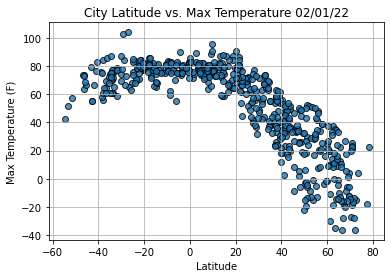

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

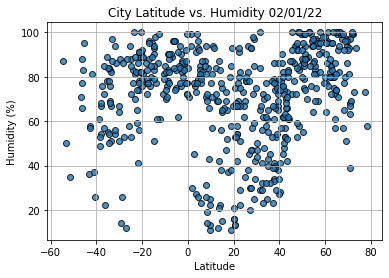

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

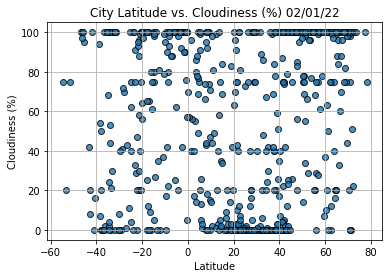

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

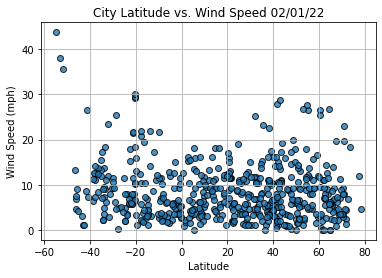

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# create a new DataFrame from a current DataFrame
index13 = city_data_df.loc[13]
index13 

City                  Tuktoyaktuk
Country                        CA
Date          2022-02-01 21:06:31
Lat                       69.4541
Lng                     -133.0374
Max Temp                     -6.2
Humidity                       97
Cloudiness                    100
Wind Speed                   7.16
Name: 13, dtype: object

In [23]:
#Filter a dataframe based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
543    False
544    False
545    False
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [25]:
#
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2022-02-01 21:01:57,72.7868,-56.1549,-15.21,73,100,6.78
1,Cherskiy,RU,2022-02-01 21:06:24,68.7500,161.3000,-6.02,80,82,3.36
2,Hammerfest,NO,2022-02-01 21:06:25,70.6634,23.6821,25.25,39,98,9.22
5,Katsuura,JP,2022-02-01 21:06:27,35.1333,140.3000,39.31,43,42,15.32
6,San Policarpo,PH,2022-02-01 21:06:28,12.1791,125.5072,78.21,84,99,10.94


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

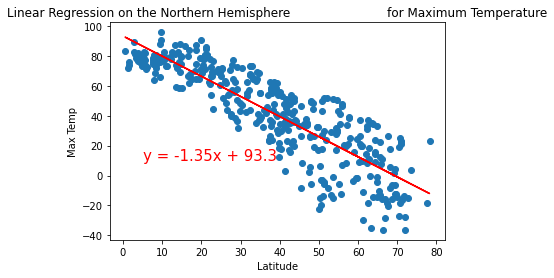

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,10))

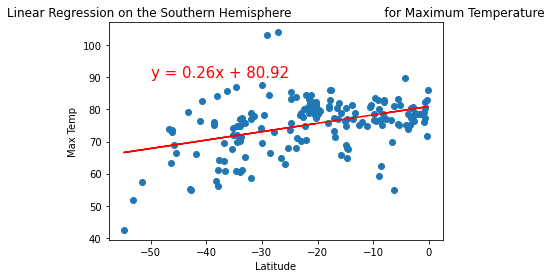

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

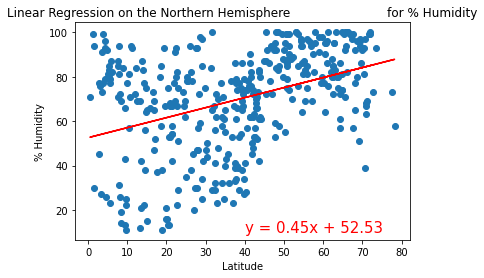

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

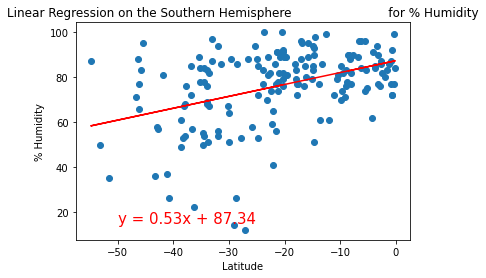

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

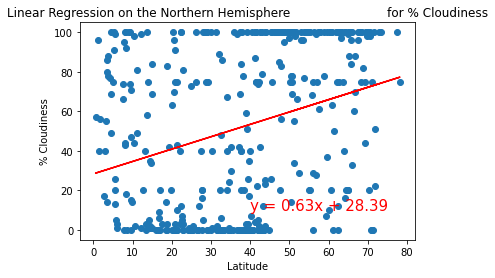

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

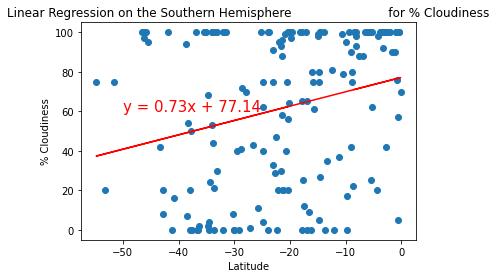

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

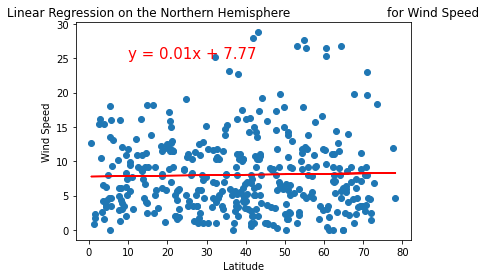

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

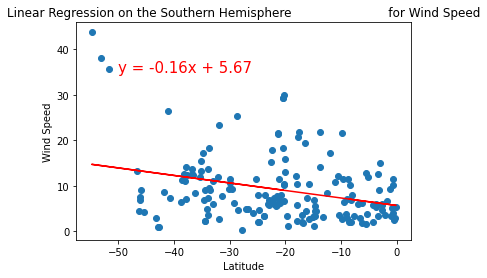

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))